# Principle Component Analysis - rice_ml
This notebook demonstrates how to use the PCA class within the rice_ml package. It presents PCA as an unsupervised dimensionality reduction technique and analyzes how the data representation changes as a result, mirroring a standard exploratory use case of the class.

Note: PCA is not a predictive model and does not produce class labels or predictions. Instead, it transforms data into a lower-dimensional space while preserving as much variance as possible. Evaluation therefore focuses on explained variance and qualitative structure rather than accuracy-based metrics.

This notebook shows how to:
- Use 'PCA' from 'rice_ml'
- Prepare and normalize data using 'rice_ml'
- Analyze explained variance and dimensionality reduction effects

## Table of Contents
- [Algorithm](#algorithm)
- [Data Preparation](#data-preparation)
- [Applying PCA](#applying-pca)
- [Results](#results)

## Algorithm
Principal Component Analysis (PCA) is an unsupervised dimensionality reduction technique used to transform high-dimensional data into a lower-dimensional representation. The goal of the algorithm is to capture as much variance in the data as possible using a smaller number of components, while preserving the overall structure of the dataset. Unlike supervised algorithms, PCA does not use labeled data and instead discovers structure directly from the input features.

The algorithm begins by centering the data and computing the directions of maximum variance, known as principal components. These components are orthogonal to one another and are ordered by the amount of variance they explain. The data is then projected onto the top components, resulting in a reduced representation with minimal information loss.

![K-Means Clustering Example](../images/pca.png)
Source: [BioRender](https://www.biorender.com/template/principal-component-analysis-pca-transformation)

Because PCA relies on variance and linear projections, the scale of each feature directly affects the result. Features with larger magnitudes can dominate the variance computation, so normalization is typically applied before performing PCA.

For example, when working with high-dimensional data such as images or feature vectors, PCA can reduce dimensionality while retaining the most informative patterns in the data. This makes the transformed representation easier to visualize and more efficient for downstream analysis.

### Pros vs Cons
#### Pros
- Reduces dimensionality while preserving variance
- Improves computational efficiency for downstream tasks
- Helps visualize high-dimensional data
- Removes redundancy among correlated features
#### Cons
- Components can be difficult to interpret
- Only captures linear relationships
- Information is lost during dimensionality reduction
- Sensitive to feature scaling

## Data Preparation
We will be using the MNIST digits dataset. It is a widely used benchmark for image classification. It contains 70,000 grayscale images of handwritten digits (0-9). Each image is 28x28 pixels.
For sake of runtime, we will be using a random 10,000 data point sample from the dataset.

X shape: (70000, 784)
y shape: (70000,)
X Overall Summary:
Min: 0.000
Max: 1.000
Mean: 0.131
Std: 0.308


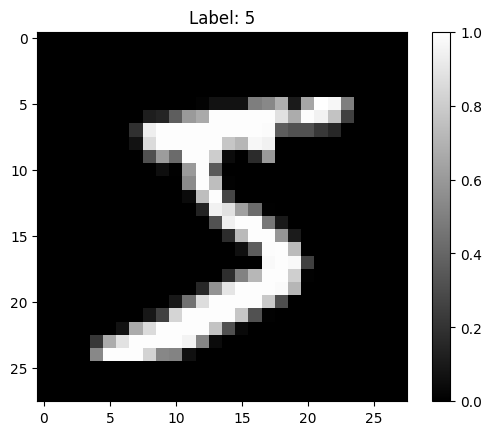

In [2]:
from sklearn.datasets import fetch_openml
import matplotlib.pyplot as plt
import numpy as np
from rice_ml.utilities import normalize, train_test_split

np.random.seed(42)

X_raw, y_raw = fetch_openml(
    "mnist_784",
    version=1,
    return_X_y=True,
    as_frame=False
)

X = np.asarray(X_raw)
y = np.asarray(y_raw)

# Scaling
X = X / 255.0

print("X shape:", X.shape)
print("y shape:", y.shape)

print("X Overall Summary:")
print(f"Min: {X.min():.3f}")
print(f"Max: {X.max():.3f}")
print(f"Mean: {X.mean():.3f}")
print(f"Std: {X.std():.3f}")

image = X[0].reshape(28, 28)

plt.imshow(image, cmap="gray")
plt.title(f"Label: {y[0]}")
plt.colorbar()
plt.show()

Each image in the dataset is represented as a high-dimensional feature vector, with one feature per pixel. This results in hundreds of dimensions, many of which are highly correlated. PCA is applied to reduce this dimensionality while preserving as much variance as possible.
## Applying PCA

Original shape: (70000, 784)
Reduced shape: (70000, 30)
Explained variance ratio (first 10 components):
[0.0975 0.0716 0.0615 0.054  0.0489 0.0431 0.0328 0.0289 0.0276 0.0234]
Total variance explained: 0.7316


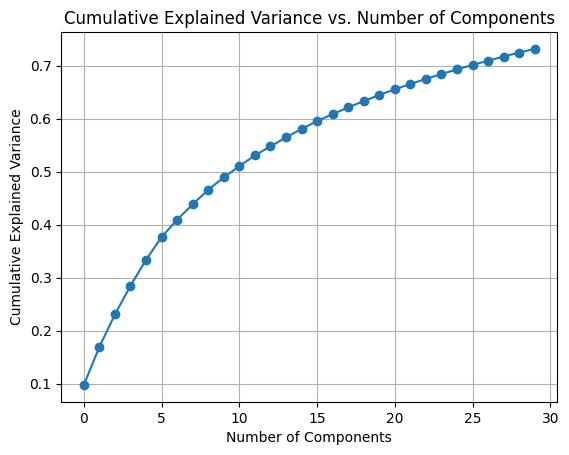

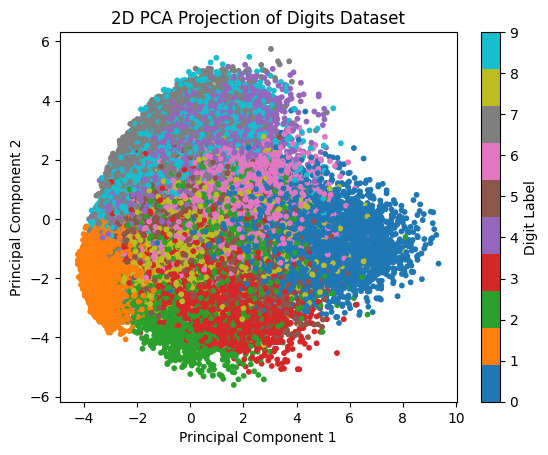

In [ ]:
from rice_ml.unsupervised_learning.pca import PrincipalComponentAnalysis
import numpy as np

X = np.asarray(X)

pca = PrincipalComponentAnalysis(n_components=30)
X_pca = pca.fit_transform(X)

print("Original shape:", X.shape)
print("Reduced shape:", X_pca.shape)

explained_var = pca.explained_variance_ratio_

print("Explained variance ratio (first 10 components):")
print(np.round(explained_var[:10], 4))

print("Total variance explained:",
      round(np.sum(explained_var), 4))


cumulative_var = np.cumsum(explained_var)

plt.plot(cumulative_var, marker="o")
plt.xlabel("Number of Components")
plt.ylabel("Cumulative Explained Variance")
plt.title("Cumulative Explained Variance vs. Number of Components")
plt.grid(True)
plt.show()

pca_2d = PrincipalComponentAnalysis(n_components=2)
X_2d = pca_2d.fit_transform(X)

y = np.asarray(y).astype(int)

plt.scatter(
    X_2d[:, 0],
    X_2d[:, 1],
    c=y,
    cmap="tab10",
    s=10
)
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.title("2D PCA Projection of Digits Dataset")
plt.colorbar(label="Digit Label")
plt.show()

## Results
The PCA results highlight both the strengths and limitations of linear dimensionality reduction on high-dimensional image data.

Reducing the original 784-dimensional data to 30 components preserves approximately 73% of the total variance. The first few components capture a large portion of the structure, with the top 10 components explaining just over 50% of the variance. Beyond roughly 20–30 components, we can see diminishing returns as the cumulative explained variance curve begins to flatten.

The 2D PCA projection helps visualize why aggressive dimensionality reduction is problematic, since it is reducing everything down to just two components. We can see that having only two components preserves less than 25% of the variance. While some structure is visible along the first principal component, some of the digit classes are heavily overlapping. This is expected, as a 2D projection captures very little of the total variance and struggles with the complex differences between handwritten digits.

Because PCA is unsupervised, it prioritizes directions of maximum variance rather than directions that best distinguish labels. As a result, using too few components can discard information that is critical for classification.